In [1]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
%matplotlib ipympl

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# A comprehensive guide to spectral representations


* **Course AIS2201 - Digital Signal Processing**
* **Week 39, 2025**
* **Lecturer: Kai Erik Hoff**

# Motivation

* When conducting spectral analysis of a signal, it is easy to get confused by the various terms for spectral representation
    * Terms that mean *almost* the same thing: "magnitude/amplitude spectrum", "power spectrum", "power spectral density"

* The primary difference relates to *how frequency components are scaled scaled*
    * When presenting a spectrum in log scale, this corresponds to shifting the entire spectrum up or down

* These differences matter when trying to attribute *physical properties* to a signal based on spectral representation:
    * Calculating signal power in Watts ($\text{W}$)
    * Measuring power per frequency unit ($\text{Hz}$)

# Common baisis: the DFT magnitude

$$ \Large |X[m]|$$

(-5000.0, 5000.0)

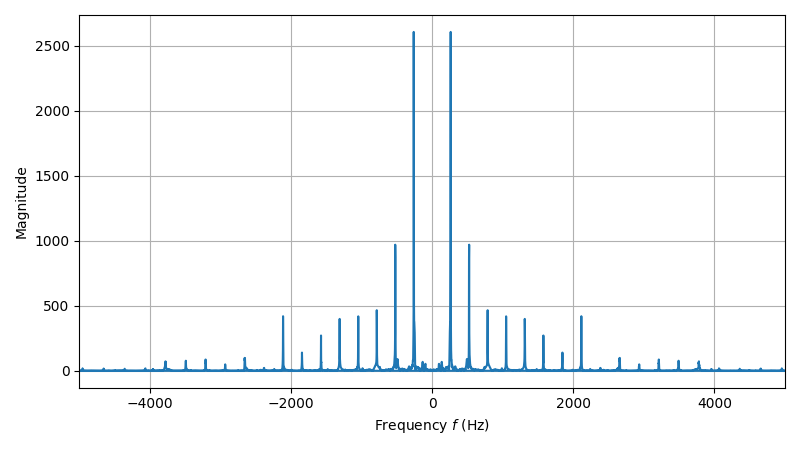

In [2]:
fs, data = wavfile.read(r'data/piano.wav') # les audiofilen 'orca.wav' og lagre til variablene 'fs' og 'data'
xn = data/np.max(np.abs(data)) # Normalize audio data
N = len(xn)

Xm = np.fft.fft(xn)
fm = np.fft.fftfreq(N, d=1/fs)

plt.close(1); plt.figure(1);
plt.plot(fm, np.abs(Xm))
plt.xlabel("Frequency $f$ (Hz)")
plt.ylabel("Magnitude")
plt.xlim([-5000, 5000])

* Two-sided, may represent frequency content of complex or real-valued signal

* Magnitude scales with window length $N$. 

* Sufficient for:
    * Identifying frequency of significant signal components
    * Calculating fundamental frequency
    * Etc..

# One-Sided Amplitude Spectrum

* Y-axis corresponds to the amplitude of each sinusoidal component with frequency $f_m = \frac{m\cdot f_s}{N}$

$$\Large A[m] = \begin{cases} \frac{1}{N}\cdot |X[m]|, & m \in \{0, \frac{N}{2} \} \\  \frac{2}{N}\cdot |X[m]|, & 0 < m < \frac{N}{2} \end{cases}$$


(0.0, 5000.0)

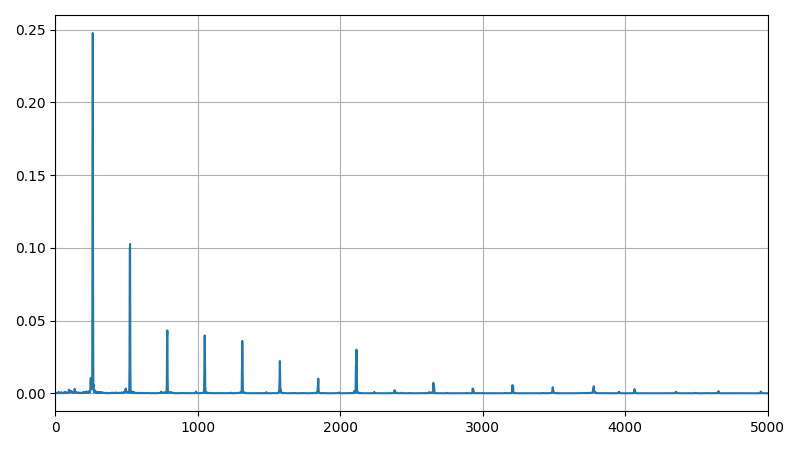

In [3]:
fs, data = wavfile.read(r'data/piano.wav') # les audiofilen 'orca.wav' og lagre til variablene 'fs' og 'data'
xn = data/np.max(np.abs(data)) # Normalize audio data
N = len(xn)

wn = sig.windows.hamming(N)

plt.close(2); plt.figure(2);

Xm = np.fft.rfft(xn*wn)/np.mean(wn)
Am = np.abs(Xm)/N
Am[1:-1] *= 2
fm = np.fft.rfftfreq(N, d=1/fs)

plt.plot(fm, Am)
plt.xlim(xmax=5000)

* If a window function is used, $A[m]$ is scaled to compensate for energy loss during windowing by dividing by the window function $w[n]$ mean:

$$\text{Window Scaling Factor} = \frac{N}{\sum_{n=0}^{N-1} w[n]}$$

# Signal Power 


<img src="figures/Signal_Energy.svg" width="70%" style="margin-left:150px" />

* **Energy:** Total work perfomred by signal
* **Power:** Momentary energy

$$P_x = \lim_{T\rightarrow \infty} \frac{1}{2T}\int_{-T}^{T} |x^2(t)| dt $$


# One-Sided Power spectrum (aka. amplitude spectrum squared)





* Each point $X_{PS}[m]$ represents the *power* of the sinusoid with frequency $f_m = \frac{m\cdot f_s}{N}$
    * Assumes real-valued input signal $x(t)$

* One-side spectrum is scaled by a factor of $2$ as a shortcut to combining positive and negative frequency components

$$\Large X_{PS}[m] = \begin{cases} \frac{1}{N^2}\cdot |X[m]|^2, & m \in \{0, \frac{N}{2} \} \\  \frac{2}{N^2}\cdot |X[m]|^2, & 0 < m < \frac{N}{2} \end{cases}$$

* Sum of power spectrum equals total power in signal

$$\Large P_x = \sum_{0}^{\frac{N}{2}} X_{PS}[m] = \frac{1}{N} x^2[n] $$

* More computationally efficient than Amplitude Spectrum

## Power Spectrum using Python

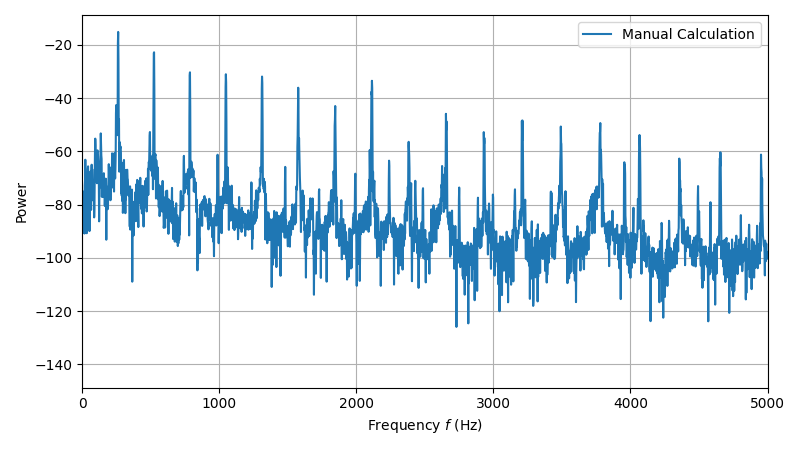

In [11]:
fs, data = wavfile.read(r'data/piano.wav') # les audiofilen 'orca.wav' og lagre til variablene 'fs' og 'data'
xn = data/np.max(np.abs(data)) # Normalize audio data
N = len(xn)

plt.close(3); plt.figure(3);
wn = sig.windows.hamming(N)

# Manual calculation
Xm = np.fft.rfft(xn*wn)/np.mean(wn)
fm = np.fft.rfftfreq(N, d=1/fs)
X_PS = (np.abs(Xm)/N)**2
X_PS[1:-1] *= 2
plt.plot(fm, 10*np.log10(X_PS), label='Manual Calculation')

plt.xlim(xmax=5000)
plt.ylabel("Power")
plt.xlabel("Frequency $f$ (Hz)")
plt.legend()

* If a window function is used, $X_{PS}$ is scaled to compensate for energy loss during windowing by dividing by the squared of the mean value of the window function $w[n]$

$$\text{Window Scaling Factor} = \frac{N^2}{\left(\sum_{n=0}^{N-1} w[n]\right)^2}$$

* `scipy` function call to calculate Power Spectrum;

In [12]:
fm, X_PS = sig.periodogram(xn, 
                           fs=fs, 
                           window='hamming',
                           scaling='spectrum' # 
                          ) 
plt.plot(fm, 10*np.log10(X_PS), ':', label='Scipy Periodogram Spectrum')
plt.legend()

# Power spectral density

* *Distirbution* of a signal's power across the frequency spectrum
* Continuous function $S_{xx}(f)$ rather than a discrete representation of spectral components.
    * Function value $S_{xx}(f)$ indicates *power per freqency unit* (e.g. Hz) at frequency $f$
    * Power contained in the frequency band $a < f < b$ is:
$$\int_{a}^{b} S_{xx}(f) df$$

<img src="figures/PDS.png" width="80%" style="margin-left:100px" />

\begin{align*}
P_x &= \int_0^\infty S_{xx}(f) \ df, & \text{for continuous signals} \\
P_x &= \int_0^\frac{f_s}{2} S_{xx}(f) \ df, & \ \text{for discrete-time signals}
\end{align*}
* where $S_{xx}(f)$ is the **Power Spectral Density** function

# Computing the PSD

* **Why?**
    * Crucial for interpreting the spectral content of a signal $x[n]$ in terms of *physical units* like $\text{Hz}$.
        * Sampling frequency is accounted for when scaling the spectrum
        * Ensures correct scaling when comparing the spectrum of signals with *different samling frequencies*

* **How??**
    * Numerous possible approaches, but most approaches are centered around the DFT
    * Estimate is typically a representation of an estimated function $\hat{S}_{xx}(f)$ at sampled at discrete frequency points $f_m$

# Periodogram

* Simplest estimate of spectral density
$$ \Large P_{xx}(f_m)\bigg|_{f_m = f_s \cdot \frac{m}{N}} = \begin{cases} \frac{1}{N\cdot f_s} \left| X[m] \right| ^2, & m \in \{0, \frac{N}{2}\} \\
\frac{2}{N\cdot f_s} \left| X[m] \right|^2, & 0 < m < \frac{N}{2}  \end{cases} $$

<!--    * Window functions often employed to avoid spectral leakage
    * Important to compensate for lost signal energy when window function is applied ([equation here](https://se.mathworks.com/help/signal/ref/enbw.html#btrjo7i-5?s_eid=PSM_15028)).



```python
f_m, P_xx = scipy.signal.periodogram(xn, # Array with signal segment
                                       fs, # Sampling Frequency
                                       window, # Window Function
                                       nfft    # Resolution after zero padding
                                      )
```
-->

* If a window function is used, $P_{xx}(f)$ is scaled to compensate for energy loss during windowing by dividing by the mean value of the window function squared

$$\text{Window Scaling Factor} = \frac{N}{\sum_{n=0}^{N-1} w^2[n]}$$

* Here is a *highly recommended video* about calculating power specral density: [https://www.youtube.com/watch?v=pfjiwxhqd1M](https://www.youtube.com/watch?v=pfjiwxhqd1M)

## Periodograms in Python


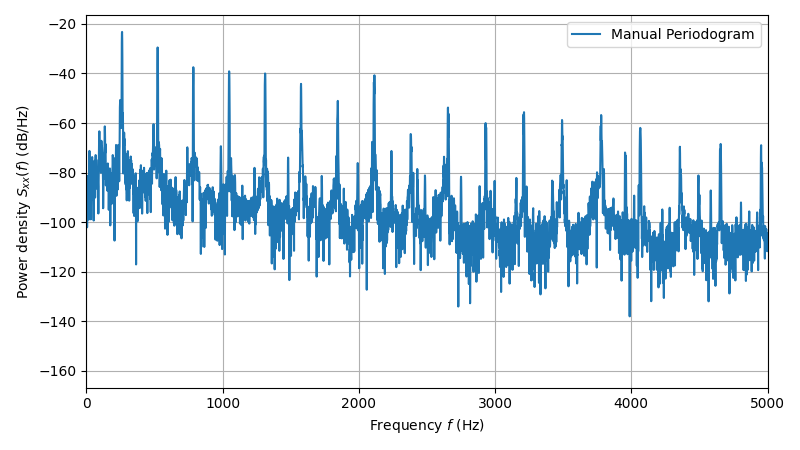

In [13]:
%matplotlib ipympl
import scipy.signal as sig
import numpy as np
from IPython.display import Audio

fs, data = wavfile.read(r'data/piano.wav')
xn = data/0x8000
N = len(xn)

wn = sig.windows.hamming(N)

Xm = np.fft.rfft(xn*wn, n=2*N) # Calculate RFFT
P_xx = np.abs(Xm)**2/(N*fs)/np.mean(wn**2) # Calculate Periodogram
P_xx[1:-1] *= 2 # Compensate for negative side of spectrum
f = np.arange(len(Xm))/(len(Xm)*2)*fs # Calculate frequency axis

plt.close(4); plt.figure(4)
plt.plot(f, 10*np.log10(P_xx), label="Manual Periodogram")
plt.xlabel("Frequency $f$ (Hz)")
plt.ylabel("Power density $S_{xx}(f)$ (dB/Hz)")
plt.xlim(xmax=5000)
plt.legend()

* Calculation in Python: [`scipy.signal.periodogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html):

In [7]:
f_m, P_xx = sig.periodogram(xn, # Array with signal segment
                                       fs, # Sampling Frequency
                                       window=sig.windows.hamming(N), # Window Function
                                       nfft = 2*N,    # Resolution after zero padding
                                       )
plt.plot(f_m, 10*np.log10(P_xx), ':C1', label="Scipy Periodogram")
plt.legend()

# Spørsmål?